# Natural Images Prediction using CNN

We will first extract the numpy array from photos: Different types of images are in their respective folders. So, we extract images as numpy arrays from those folders, and give them labels name(=folder name).

Then we can manipulate our arrays and data in order to run the CNN model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Defining directories:

airplane = 'data/airplane/'
car = 'data/car/'
cat = 'data/cat/'
dog = 'data/dog/'
flower = 'data/flower/'
fruit = 'data/fruit/'
motorbike = 'data/motorbike/'
person = 'data/person/'

In [3]:
X = []
y= []

In [4]:
size=150

In [5]:
import cv2
import os
from PIL import Image

In [6]:
#We will try and load images as Numpy arrays and give them respective labels alongwith. 

In [7]:
img_size=100

In [8]:
def assign_label(img, label):
    return label

In [9]:
def prepare_data(label,DIR):
    for img in os.listdir(DIR):
        label=assign_label(img,label)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (img_size,img_size))
        
        X.append(np.array(img))
        y.append(str(label))

In [10]:

prepare_data('airplane', airplane)
prepare_data('car', car)
prepare_data('cat', cat)
prepare_data('dog', dog)
prepare_data('flower', flower)
prepare_data('fruit', fruit)
prepare_data('motorbike',motorbike)
prepare_data('person', person)

In [11]:

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le=LabelEncoder()
y=le.fit_transform(y)
y=to_categorical(y,8)
X=np.array(X)
X=X/255

Using TensorFlow backend.


In [12]:
X.shape

(6899, 100, 100, 3)

In [13]:
y.shape

(6899, 8)

In [14]:
#visualizing photos:

Label code of the photo: [0. 0. 1. 0. 0. 0. 0. 0.]


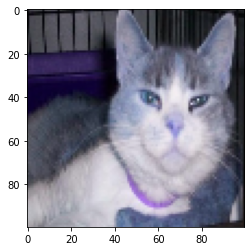

In [15]:
import matplotlib.pyplot as plt
import numpy as np
# sample 2D array
print("Label code of the photo:", y[2044])
plt.imshow(X[2044], cmap="gray")
plt.show()

In [16]:
y[4]

array([1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
def show_class(num):
    #Print the category of cloth:
    print("type of image is: ") 
    if np.argmax(y[num])==0:
        print("airplane")
    elif np.argmax(y[num])==1:
        print("cat")
    elif np.argmax(y[num])==2:
        print("car")
    elif np.argmax(y[num])==3:
        print("dog")
    elif np.argmax(y[num])==4:
        print("flower")  
    elif np.argmax(y[num])==5:
        print("fruit")
    elif np.argmax(y[num])==6:
        print("motorbike")
    else:
        print("person")
    plt.imshow(X[num],cmap="gray")
    plt.show()

type of image is: 
airplane


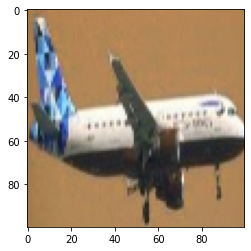

type of image is: 
airplane


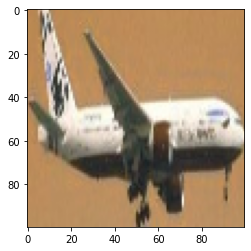

type of image is: 
airplane


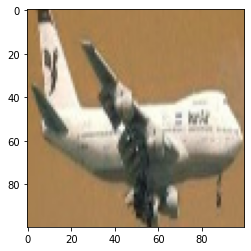

type of image is: 
airplane


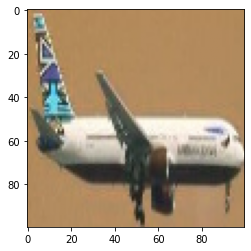

type of image is: 
airplane


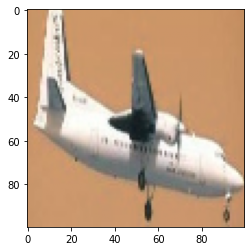

type of image is: 
airplane


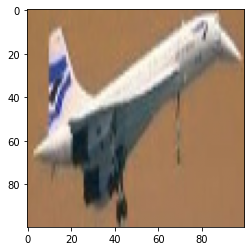

type of image is: 
airplane


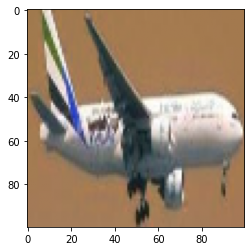

type of image is: 
airplane


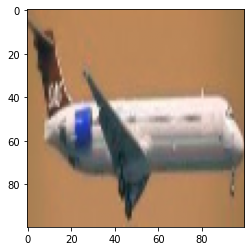

type of image is: 
airplane


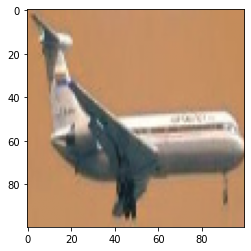

type of image is: 
airplane


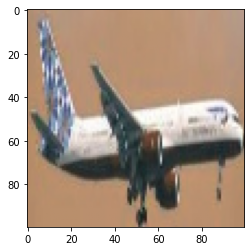

type of image is: 
airplane


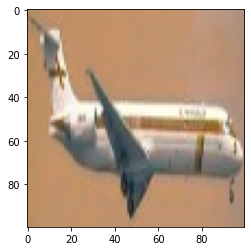

type of image is: 
airplane


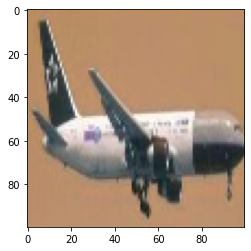

type of image is: 
airplane


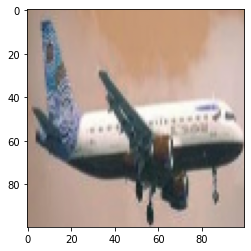

type of image is: 
airplane


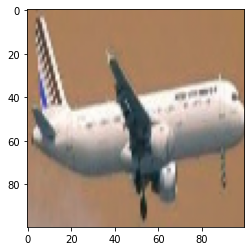

type of image is: 
airplane


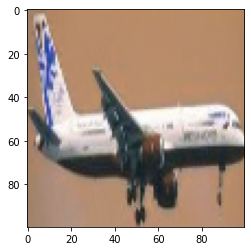

type of image is: 
airplane


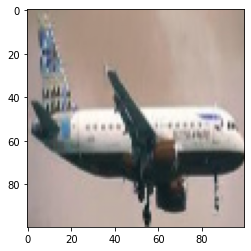

type of image is: 
airplane


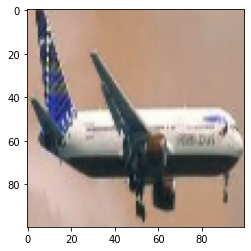

type of image is: 
airplane


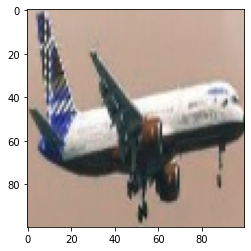

type of image is: 
airplane


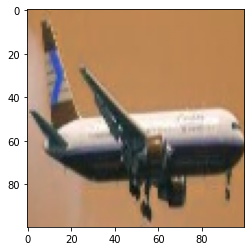

type of image is: 
airplane


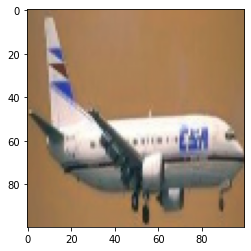

type of image is: 
airplane


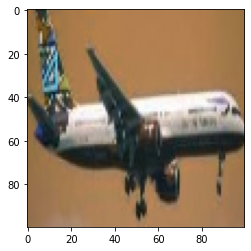

type of image is: 
airplane


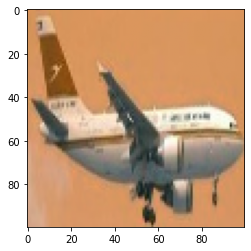

type of image is: 
airplane


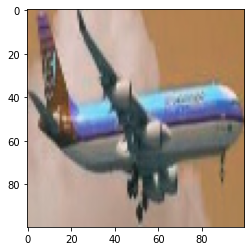

type of image is: 
airplane


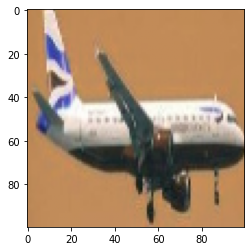

type of image is: 
airplane


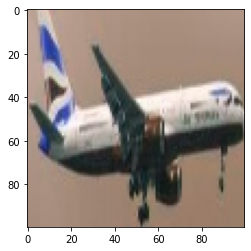

type of image is: 
airplane


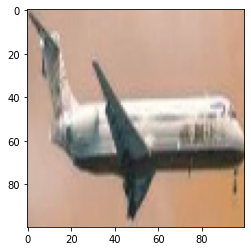

type of image is: 
airplane


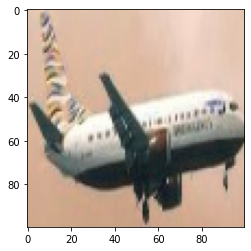

type of image is: 
airplane


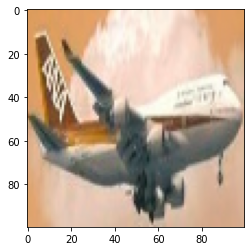

type of image is: 
airplane


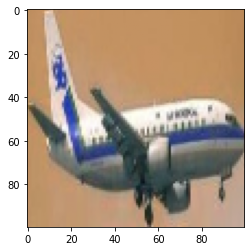

type of image is: 
airplane


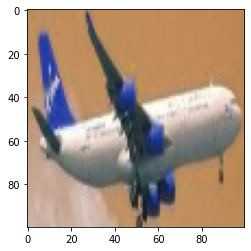

type of image is: 
airplane


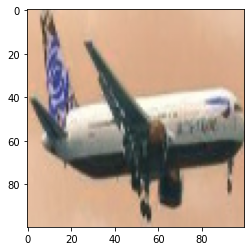

type of image is: 
airplane


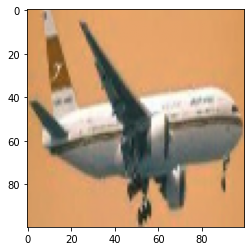

type of image is: 
airplane


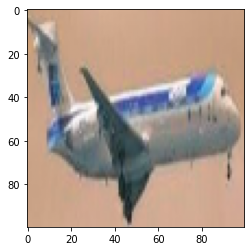

type of image is: 
airplane


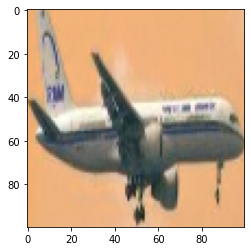

type of image is: 
airplane


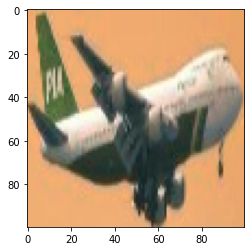

type of image is: 
airplane


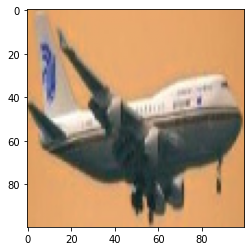

type of image is: 
airplane


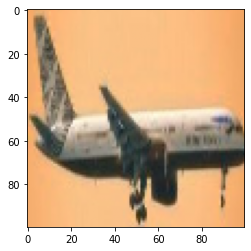

type of image is: 
airplane


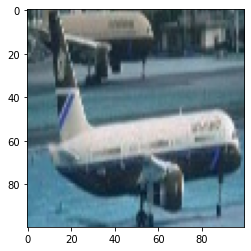

type of image is: 
airplane


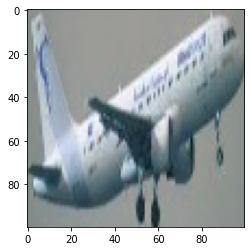

type of image is: 
airplane


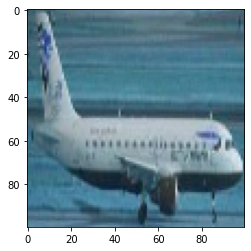

type of image is: 
airplane


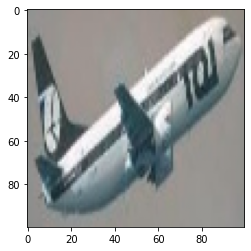

type of image is: 
airplane


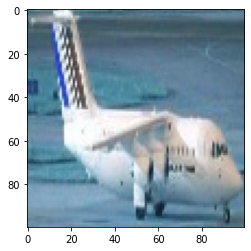

type of image is: 
airplane


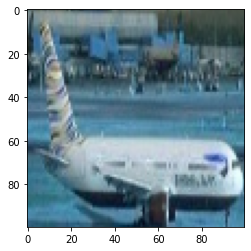

type of image is: 
airplane


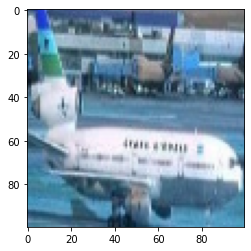

type of image is: 
airplane


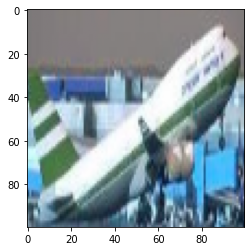

type of image is: 
airplane


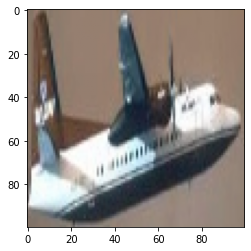

type of image is: 
airplane


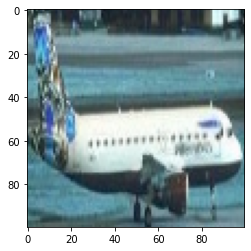

type of image is: 
airplane


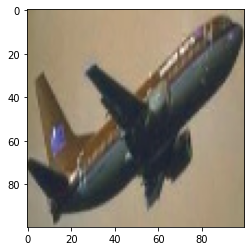

type of image is: 
airplane


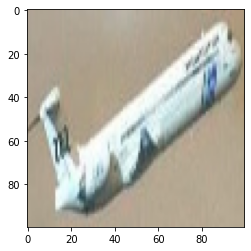

type of image is: 
airplane


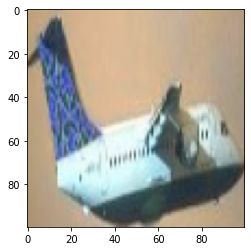

In [18]:
a = list(range(500,550))
for i in a:
    show_class(i)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

type of image is: 
dog


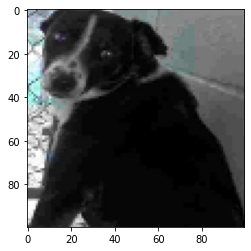

type of image is: 
person


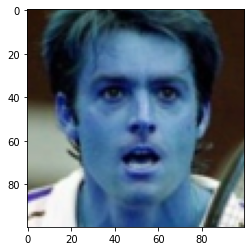

type of image is: 
cat


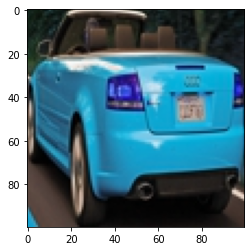

type of image is: 
cat


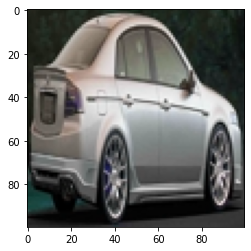

type of image is: 
airplane


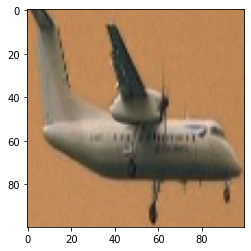

type of image is: 
car


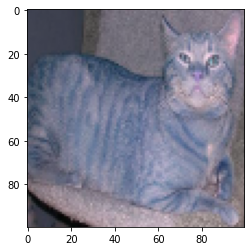

type of image is: 
dog


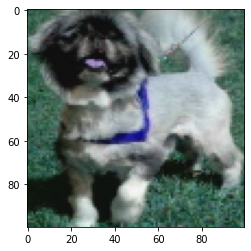

type of image is: 
dog


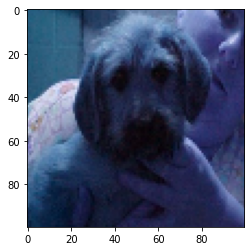

type of image is: 
fruit


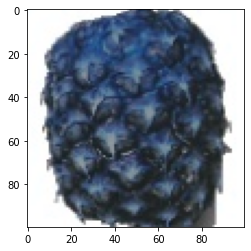

type of image is: 
person


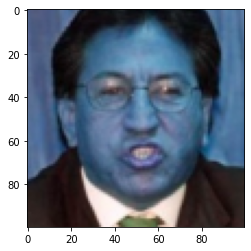

In [20]:
#Viewing images randomly:

import random as rn
for i in range(10):
    l=rn.randint(0,len(y[:,2]))
    show_class(l)
    

In [21]:
X_train.shape

(5174, 100, 100, 3)

In [22]:
#Building the CNN model:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.optimizers import RMSprop


In [23]:
X_train[124].shape

(100, 100, 3)

In [25]:
from keras.layers import BatchNormalization

model=Sequential()
    
model.add(Conv2D(256,(3,3), activation='relu', input_shape=(100,100,3),padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8,activation='sigmoid'))
    



In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=50,
                    verbose=2,
                    validation_data=(X_test, y_test))

Train on 5174 samples, validate on 1725 samples
Epoch 1/50
